In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import os

# Define dataset paths
data_dir = "C:\\Users\\HP\\Documents\\major_project\\Data_set\\final_datasets\\final_datasetsssss"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
val_dir = os.path.join(data_dir, "validation")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained ResNet50 model
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))  # Adjust final layer for classification
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        train_acc = 100 * correct / total
        val_acc = evaluate_model(model, val_loader)
        print(f'Epoch {epoch+1}: Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%')
    
    return model

# Evaluation function
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return 100 * correct / total

# Train and evaluate
model = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)
test_accuracy = evaluate_model(model, test_loader)
print(f'Test Accuracy: {test_accuracy:.2f}%')


C:\Users\HP\anaconda3\python\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\HP\anaconda3\python\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\HP/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|██████████████████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:19<00:00, 5.28MB/s]


Epoch 1: Loss: 0.2214, Train Acc: 91.91%, Val Acc: 45.41%
Epoch 2: Loss: 0.0970, Train Acc: 96.74%, Val Acc: 84.10%
Epoch 3: Loss: 0.1237, Train Acc: 95.70%, Val Acc: 60.66%
Epoch 4: Loss: 0.0890, Train Acc: 96.54%, Val Acc: 77.21%
Epoch 5: Loss: 0.0608, Train Acc: 97.54%, Val Acc: 64.43%
Epoch 6: Loss: 0.0500, Train Acc: 97.73%, Val Acc: 47.54%
Epoch 7: Loss: 0.0563, Train Acc: 97.85%, Val Acc: 74.75%
Epoch 8: Loss: 0.1049, Train Acc: 95.84%, Val Acc: 97.54%
Epoch 9: Loss: 0.1169, Train Acc: 96.01%, Val Acc: 85.90%
Epoch 10: Loss: 0.0482, Train Acc: 98.20%, Val Acc: 63.93%
Test Accuracy: 67.54%


In [3]:
from torchvision.models import DenseNet121_Weights

model = models.densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\HP/.cache\torch\hub\checkpoints\densenet121-a639ec97.pth
100%|███████████████████████████████████████████████████████████████████████████████████████████| 30.8M/30.8M [03:01<00:00, 178kB/s]


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import os

# Define dataset paths
data_dir = "C:\\Users\\HP\\Documents\\major_project\\Data_set\\final_datasets\\final_datasetsssss"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
val_dir = os.path.join(data_dir, "validation")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained DenseNet121 model
model = models.densenet121(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, len(train_dataset.classes))  # Adjust final layer for classification
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        train_acc = 100 * correct / total
        val_acc = evaluate_model(model, val_loader)
        print(f'Epoch {epoch+1}: Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%')
    
    return model

# Evaluation function
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return 100 * correct / total

# Train and evaluate
model = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)
test_accuracy = evaluate_model(model, test_loader)
print(f'Test Accuracy: {test_accuracy:.2f}%')


Epoch 1: Loss: 0.1775, Train Acc: 93.76%, Val Acc: 80.49%
Epoch 2: Loss: 0.1018, Train Acc: 96.13%, Val Acc: 86.56%
Epoch 3: Loss: 0.0924, Train Acc: 96.74%, Val Acc: 78.20%
Epoch 4: Loss: 0.0730, Train Acc: 97.22%, Val Acc: 91.48%
Epoch 5: Loss: 0.0633, Train Acc: 97.42%, Val Acc: 98.20%
Epoch 6: Loss: 0.0670, Train Acc: 97.44%, Val Acc: 97.70%
Epoch 7: Loss: 0.0518, Train Acc: 97.99%, Val Acc: 64.92%
Epoch 8: Loss: 0.0399, Train Acc: 98.22%, Val Acc: 98.20%
Epoch 9: Loss: 0.0548, Train Acc: 98.08%, Val Acc: 28.69%
Epoch 10: Loss: 0.0736, Train Acc: 97.26%, Val Acc: 61.31%
Test Accuracy: 66.72%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Define dataset paths
train_dir = r"C:\Users\HP\Documents\major_project\Data_set\final_datasets\final_datasetsssss\train"
val_dir = r"C:\Users\HP\Documents\major_project\Data_set\final_datasets\final_datasetsssss\validation"
test_dir = r"C:\Users\HP\Documents\major_project\Data_set\final_datasets\final_datasetsssss\test"

# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

# Data augmentation and normalization
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, shear=0.2, scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Load Vision Transformer (ViT) model
vit_model = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)
num_ftrs = vit_model.heads.head.in_features
vit_model.heads.head = nn.Linear(num_ftrs, len(train_dataset.classes))  # Adjust output layer

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vit_model = vit_model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vit_model.parameters(), lr=1e-4)

# Training function
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=50):
    best_acc = 0.0
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        
        # Validation step
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)
        val_acc = val_correct / val_total
        
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, Val Acc: {val_acc:.4f}")
        
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_vit_model.pth")  # Save best model
    
    print("Training complete. Best Val Acc: {:.4f}".format(best_acc))

# Train the model
train_model(vit_model, criterion, optimizer, train_loader, val_loader, num_epochs=50)

# Test the model
vit_model.load_state_dict(torch.load("best_vit_model.pth"))
vit_model.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vit_model(inputs)
        _, preds = torch.max(outputs, 1)
        test_correct += (preds == labels).sum().item()
        test_total += labels.size(0)

test_acc = test_correct / test_total
print(f"Test Accuracy: {test_acc:.2%}")

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to C:\Users\HP/.cache\torch\hub\checkpoints\vit_b_16-c867db91.pth
100%|████████████████████████████████████████████████████████████████████████████████████████████| 330M/330M [02:52<00:00, 2.01MB/s]


Epoch 1/50 - Loss: 0.4853, Train Acc: 0.7508, Val Acc: 0.8623
Epoch 2/50 - Loss: 0.3096, Train Acc: 0.8518, Val Acc: 0.8852
Epoch 3/50 - Loss: 0.3106, Train Acc: 0.8700, Val Acc: 0.9557
Epoch 4/50 - Loss: 0.2137, Train Acc: 0.9124, Val Acc: 0.9541
Epoch 5/50 - Loss: 0.2240, Train Acc: 0.9021, Val Acc: 0.9295
Epoch 6/50 - Loss: 0.2037, Train Acc: 0.9199, Val Acc: 0.9295
Epoch 7/50 - Loss: 0.1739, Train Acc: 0.9304, Val Acc: 0.9508
Epoch 8/50 - Loss: 0.1461, Train Acc: 0.9416, Val Acc: 0.9213
Epoch 9/50 - Loss: 0.1743, Train Acc: 0.9345, Val Acc: 0.9279
Epoch 10/50 - Loss: 0.1639, Train Acc: 0.9384, Val Acc: 0.9754
Epoch 11/50 - Loss: 0.1352, Train Acc: 0.9470, Val Acc: 0.9770


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Define dataset paths
train_dir = r"C:\Users\HP\Documents\major_project\Data_set\final_datasets\final_datasetsssss\train"
val_dir = r"C:\Users\HP\Documents\major_project\Data_set\final_datasets\final_datasetsssss\validation"
test_dir = r"C:\Users\HP\Documents\major_project\Data_set\final_datasets\final_datasetsssss\test"

# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

# Data augmentation and normalization
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, shear=0.2, scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Load Vision Transformer (ViT) model
vit_model = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)
num_ftrs = vit_model.heads.head.in_features
vit_model.heads.head = nn.Linear(num_ftrs, len(train_dataset.classes))  # Adjust output layer

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vit_model = vit_model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vit_model.parameters(), lr=1e-4)

# Training function with early stopping
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=40, patience=5):
    best_acc = 0.0
    best_epoch = 0
    patience_counter = 0
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        
        # Validation step
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)
        val_acc = val_correct / val_total
        
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, Val Acc: {val_acc:.4f}")
        
        # Check for early stopping
        if val_acc > best_acc:
            best_acc = val_acc
            best_epoch = epoch
            patience_counter = 0
            torch.save(model.state_dict(), "best_vit_model.pth")  # Save best model
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}. Best Val Acc: {best_acc:.4f} at epoch {best_epoch+1}.")
                break
    
    print("Training complete. Best Val Acc: {:.4f} at epoch {}".format(best_acc, best_epoch+1))

# Train the model
train_model(vit_model, criterion, optimizer, train_loader, val_loader, num_epochs=40, patience=5)

# Test the model
vit_model.load_state_dict(torch.load("best_vit_model.pth"))
vit_model.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vit_model(inputs)
        _, preds = torch.max(outputs, 1)
        test_correct += (preds == labels).sum().item()
        test_total += labels.size(0)

test_acc = test_correct / test_total
print(f"Test Accuracy: {test_acc:.2%}")

Epoch 1/40 - Loss: 0.4939, Train Acc: 0.7469, Val Acc: 0.8082
Epoch 2/40 - Loss: 0.3439, Train Acc: 0.8382, Val Acc: 0.9033
Epoch 3/40 - Loss: 0.3112, Train Acc: 0.8542, Val Acc: 0.8426
Epoch 4/40 - Loss: 0.2657, Train Acc: 0.8837, Val Acc: 0.8705
Epoch 5/40 - Loss: 0.2559, Train Acc: 0.8919, Val Acc: 0.9426
Epoch 6/40 - Loss: 0.2329, Train Acc: 0.9005, Val Acc: 0.8820
Epoch 7/40 - Loss: 0.2201, Train Acc: 0.9044, Val Acc: 0.8246
Epoch 8/40 - Loss: 0.1776, Train Acc: 0.9261, Val Acc: 0.9393
Epoch 9/40 - Loss: 0.1690, Train Acc: 0.9333, Val Acc: 0.7639
Epoch 10/40 - Loss: 0.1733, Train Acc: 0.9333, Val Acc: 0.9459
Epoch 11/40 - Loss: 0.1350, Train Acc: 0.9476, Val Acc: 0.9574
Epoch 12/40 - Loss: 0.1717, Train Acc: 0.9296, Val Acc: 0.9803
Epoch 13/40 - Loss: 0.1429, Train Acc: 0.9408, Val Acc: 0.9770
Epoch 14/40 - Loss: 0.1410, Train Acc: 0.9429, Val Acc: 0.9770
Epoch 15/40 - Loss: 0.1633, Train Acc: 0.9333, Val Acc: 0.9656
Epoch 16/40 - Loss: 0.1185, Train Acc: 0.9533, Val Acc: 0.9656
E

C:\Users\HP\AppData\Local\Temp\ipykernel_7900\4152639694.py:117: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vit_model.load_state_dict(torch.load("best_vit_model.pth"))


Test Accuracy: 96.08%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.models import vit_b_16
import os
import time

# Define dataset paths
data_dir = "C:\\Users\\HP\\Documents\\major_project\\Data_set\\final_datasets\\final_datasetsssss"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
val_dir = os.path.join(data_dir, "validation")

# Data Augmentation for Training
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Standard Transform for Test/Validation
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=test_transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=test_transform)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained Vision Transformer model
model = vit_b_16(weights="IMAGENET1K_V1")
num_ftrs = model.heads.head.in_features

# Modify the classifier
model.heads.head = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, len(train_dataset.classes))
)

model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20):
    start_time = time.time()
    
    for epoch in range(num_epochs):
        epoch_start = time.time()
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_acc = 100 * correct / total
        val_acc, val_loss = evaluate_model(model, val_loader, criterion)

        # Learning rate scheduler step
        scheduler.step(val_loss)
        
        epoch_time = time.time() - epoch_start
        print(f'Epoch {epoch+1}: Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, Time: {epoch_time:.2f} sec')
    
    total_time = time.time() - start_time
    print(f'\nTotal Training Time: {total_time:.2f} seconds ({total_time/60:.2f} minutes)')
    torch.save(model.state_dict(), "best_vit_model.pth")  # Save the final model
    return model

# Evaluation function
def evaluate_model(model, data_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    total_loss = 0.0
    start_time = time.time()

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    total_time = time.time() - start_time
    avg_loss = total_loss / len(data_loader)
    accuracy = 100 * correct / total
    print(f"Evaluation Time: {total_time:.2f} seconds")
    return accuracy, avg_loss

# Measure inference time
def measure_inference_time(model, data_loader, num_batches=10):
    model.eval()
    start_time = time.time()
    
    with torch.no_grad():
        for i, (inputs, _) in enumerate(data_loader):
            if i >= num_batches:
                break
            inputs = inputs.to(device)
            model(inputs)
    
    total_time = time.time() - start_time
    avg_time_per_batch = total_time / num_batches
    print(f"Average Inference Time per Batch: {avg_time_per_batch:.4f} seconds")

# Train and evaluate
model = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20)
model.load_state_dict(torch.load("best_vit_model.pth"))  # Load final model
test_accuracy, _ = evaluate_model(model, test_loader, criterion)
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Measure inference time
measure_inference_time(model, test_loader)


C:\Users\HP\anaconda3\python\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Evaluation Time: 158.98 seconds
Epoch 1: Loss: 0.7037, Train Acc: 64.54%, Val Acc: 79.02%, Time: 4246.97 sec
Evaluation Time: 151.41 seconds
Epoch 2: Loss: 0.3960, Train Acc: 81.61%, Val Acc: 91.97%, Time: 4016.54 sec
Evaluation Time: 160.48 seconds
Epoch 3: Loss: 0.3679, Train Acc: 84.23%, Val Acc: 93.11%, Time: 4168.26 sec
Evaluation Time: 151.30 seconds
Epoch 4: Loss: 0.2437, Train Acc: 89.68%, Val Acc: 96.39%, Time: 4112.66 sec
Evaluation Time: 159.95 seconds
Epoch 5: Loss: 0.2434, Train Acc: 89.93%, Val Acc: 91.80%, Time: 4023.24 sec
Evaluation Time: 151.70 seconds
Epoch 6: Loss: 0.1916, Train Acc: 92.24%, Val Acc: 97.54%, Time: 4138.76 sec
Evaluation Time: 151.45 seconds
Epoch 7: Loss: 0.1886, Train Acc: 92.49%, Val Acc: 96.23%, Time: 3973.65 sec
Evaluation Time: 151.11 seconds
Epoch 8: Loss: 0.1743, Train Acc: 93.18%, Val Acc: 97.70%, Time: 3949.93 sec
Evaluation Time: 150.69 seconds
Epoch 9: Loss: 0.2147, Train Acc: 91.83%, Val Acc: 97.38%, Time: 3937.39 sec
Evaluation Time: 15

C:\Users\HP\AppData\Local\Temp\ipykernel_11332\3224504223.py:144: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_vit_model.pth"))  # Lo

Evaluation Time: 156.44 seconds
Test Accuracy: 97.39%
Average Inference Time per Batch: 7.7635 seconds


Precision: 0.9744
Recall: 0.9739
F1-Score: 0.9740

Classification Report:
              precision    recall  f1-score   support

      benign       0.98      0.95      0.96       212
   malignant       1.00      1.00      1.00       257
      normal       0.93      0.97      0.95       144

    accuracy                           0.97       613
   macro avg       0.97      0.97      0.97       613
weighted avg       0.97      0.97      0.97       613



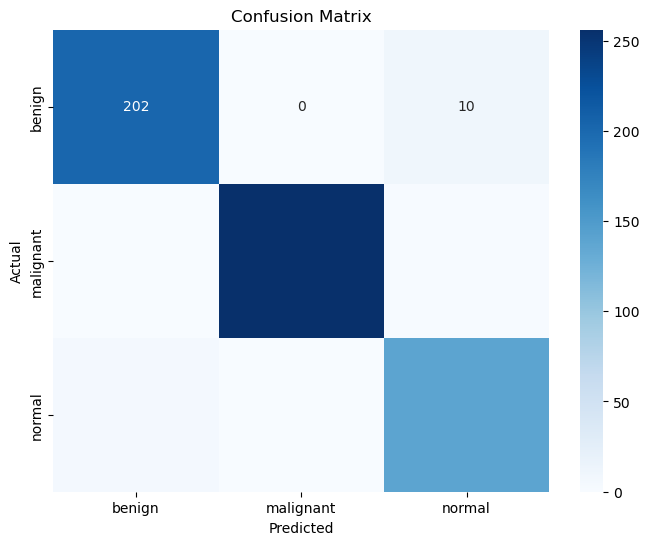

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

def evaluate_metrics(model, data_loader, class_names):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Compute Precision, Recall, and F1-Score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Get class names from dataset
class_names = train_dataset.classes  # Assuming class names are the same across datasets

# Evaluate model
evaluate_metrics(model, test_loader, class_names)


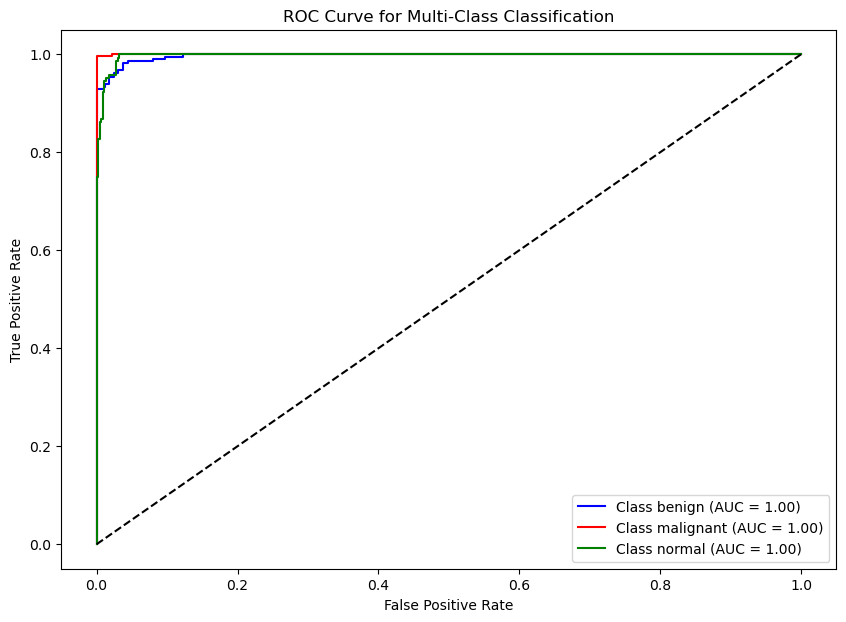

In [3]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import torch

def plot_roc_auc(model, data_loader, num_classes, class_names):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)  # Raw scores before softmax
            
            y_true.extend(labels.cpu().numpy())
            y_scores.extend(outputs.cpu().numpy())

    # Convert to NumPy arrays
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)

    # Binarize the labels for multi-class ROC computation
    y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))

    # Compute ROC curve and AUC for each class
    plt.figure(figsize=(10, 7))
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i % len(colors)], label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

    # Plot random chance line
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-Class Classification')
    plt.legend(loc='lower right')
    plt.show()

# Get class names from dataset
class_names = train_dataset.classes  
num_classes = len(class_names)

# Call function to plot ROC curves
plot_roc_auc(model, test_loader, num_classes, class_names)


In [2]:
import torch
from torchvision import transforms
from PIL import Image

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the trained Vision Transformer (ViT) model
from torchvision.models import vit_b_16
model = vit_b_16(weights=None)
num_ftrs = model.heads.head.in_features

# Modify the classifier to match the number of classes
model.heads.head = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(num_ftrs, 3)  # 3 classes: Benign, Malignant, Normal
)

# Load trained weights
model.load_state_dict(torch.load("best_vit_model.pth", map_location=device))
model.to(device)
model.eval()

# Define the transformation for the input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Path to the image
image_path = r"C:\Users\HP\Documents\major_project\Data_set\final_datasets\final_datasetsssss\test\benign\image_864.png"

# Open the image
image = Image.open(image_path).convert("RGB")

# Apply transformations to the image
image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

# Perform inference
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output, 1)

# Define class names
class_names = ["Benign", "Malignant", "Normal"]

# Get predicted class
predicted_class = class_names[predicted.item()]
print(f"Predicted Class: {predicted_class}")


C:\Users\HP\AppData\Local\Temp\ipykernel_13816\3044509332.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_vit_model.pth", map_loc

Predicted Class: Benign
